# Simple Linear Regression using Statsmodel

## Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset

In [2]:
df= pd.read_csv('Advertising.csv')

In [3]:
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
# Dropping the "Unnamed: 0" column
df1 = df.drop('Unnamed: 0',axis='columns') 

In [5]:
df1.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


# Splitting the dataset into the Training set and Test set

In [6]:
x = df1[['TV','Radio','Newspaper']]
y = df1['Sales']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2,random_state=456)

In [8]:
X = df1[['TV','Radio','Newspaper']]
y = df1['Sales']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,random_state=456)

In [10]:
X_train.head(10)

,TV,Radio,Newspaper
7,120.2,19.6,11.6
115,75.1,35.0,52.7
180,156.6,2.6,8.3
82,75.3,20.3,32.5
128,220.3,49.0,3.2
74,213.4,24.6,13.1
133,219.8,33.5,45.1
181,218.5,5.4,27.4
19,147.3,23.9,19.1
6,57.5,32.8,23.5


# Fitting the Model into the Training set 

### And <strong> Adding an intercept as this is a statsmodel. Adding intercept manually.

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
import statsmodels.api as sm

In [13]:
X_endog = sm.add_constant(X_train)
X_endog1 = sm.add_constant(X_test)

In [14]:
res = sm.OLS(Y_train, X_endog)
res.fit()

## Evaluation Done on Training Set

In [15]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     483.3
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           9.89e-79
Time:                        00:40:52   Log-Likelihood:                -298.55
No. Observations:                 160   AIC:                             605.1
Df Residuals:                     156   BIC:                             617.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1890      0.338      9.447      0.000       2.522       3.856
TV             0.0445      0.001     29.967      0.000       0.042       0.047
Radio          0.1953      0.009     21.969      0.000       0.178       0.213
Newspaper     -0.0086      0.006     -1.429      0.155      -0.021       0.003
==============================================================================
Omnibus:                       18.960   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.847
Skew:                          -0.874   Prob(JB):                     1.80e-05
Kurtosis:                       3.469   Cond. No.                         467.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predicting the Test set results

In [16]:
y_pred = res.fit().predict(X_endog1)

In [17]:
y_pred

113    16.455470
116    11.960557
1      12.457893
3      17.498131
119     6.985676
169    17.866111
127     6.681294
136    11.867146
145     9.730837
55     21.178490
182     6.548588
48     15.962660
52     20.630154
99     16.959285
144    10.028128
161    13.572781
154    15.592618
59     18.255131
183    23.776651
157     9.904414
87     15.503644
195     5.493742
189     6.183145
28     19.365542
143     8.663521
98     23.911588
141    18.077170
198    23.451589
137    20.507878
81     14.350721
176    19.975780
86     11.820759
31     11.282382
140     9.667297
166    11.144359
106     6.194365
12     10.535656
9      12.412009
130    10.880576
124    19.078126
dtype: float64

## Visualizing the result

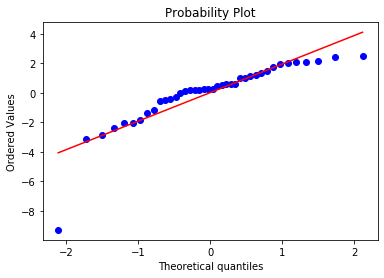

In [20]:
from scipy import stats
stats.probplot(Y_test-y_pred, plot=plt)
plt.show()

## Model Evaluation for Training set

In [22]:
y_pred_training = res.fit().predict(X_endog)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, y_pred_training))
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, y_pred_training))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, y_pred_training)))

Mean Absolute Error: 1.209321734365631
Mean Squared Error: 2.4448986294473154
Root Mean Squared Error: 1.5636171620468085


In [23]:
def mean_absolute_percentage_error(y_true, y_pred_training): 
    return np.mean(np.abs((y_true - y_pred_training) / y_true)) * 100

In [25]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(Y_train, y_pred_training))

Mean Absolute percentage error: 11.432113885671278


## Model Evaluation for Test set

In [26]:
y_pred_test = res.fit().predict(X_endog1)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test)))

Mean Absolute Error: 1.4100334224032867
Mean Squared Error: 4.328969517515584
Root Mean Squared Error: 2.080617580795564


In [27]:
def mean_absolute_percentage_error(y_true, y_pred_test): 
    return np.mean(np.abs((y_true - y_pred_test) / y_true)) * 100

In [28]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(Y_test, y_pred_test))

Mean Absolute percentage error: 24.306568218139088


# Fitting the Model into the Training set -> NOT Adding an intercept as this is a statsmodel. 

In [29]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, y, test_size = 0.2,random_state=456)

In [30]:
import statsmodels.api as sm

In [31]:
res = sm.OLS(Y_train1, X_train1)
res.fit()

## Evaluation Done on Training Set

In [32]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2962.
Date:                Fri, 19 Mar 2021   Prob (F-statistic):                   6.39e-138
Time:                        00:42:37   Log-Likelihood:                         -334.74
No. Observations:                 160   AIC:                                      675.5
Df Residuals:                     157   BIC:                                      684.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0536      0.001     37.611      0.000       0.051       0.056
Radio          0.2309      0.010     22.923      0.000       0.211       0.251
Newspaper      0.0117      0.007      1.654      0.100      -0.002       0.026
==============================================================================
Omnibus:                        0.354   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.838   Jarque-Bera (JB):                0.140
Skew:                           0.053   Prob(JB):                        0.933
Kurtosis:                       3.099   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predicting Testing Data

In [33]:
y_pred1 = regressor.predict(X_test1)
y_pred1

array([16.45547002, 11.96055672, 12.45789283, 17.49813115,  6.98567583,
       17.86611109,  6.68129359, 11.86714576,  9.73083692, 21.17848996,
        6.54858767, 15.96266034, 20.63015365, 16.95928528, 10.02812844,
       13.57278097, 15.5926183 , 18.25513131, 23.77665093,  9.90441413,
       15.50364414,  5.49374182,  6.18314477, 19.36554219,  8.66352125,
       23.91158754, 18.07716976, 23.45158887, 20.50787812, 14.35072124,
       19.97577955, 11.82075926, 11.28238184,  9.66729739, 11.14435943,
        6.19436489, 10.53565608, 12.41200901, 10.88057563, 19.07812626])

## Visualizing the result

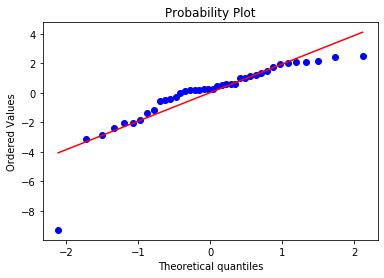

In [35]:
from scipy import stats
stats.probplot(Y_test1-y_pred1, plot=plt)
plt.show()

## Model Evaluation for Training set

In [36]:
y_pred_train = res.fit().predict(X_train1)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train1, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(Y_train1, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train1, y_pred_train)))

Mean Absolute Error: 1.4958793401652524
Mean Squared Error: 3.843465284685479
Root Mean Squared Error: 1.9604757801833408


In [37]:
def mean_absolute_percentage_error(y_true, y_pred_train): 
    return np.mean(np.abs((y_true - y_pred_train) / y_true)) * 100

In [38]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(Y_train1, y_pred_train))

Mean Absolute percentage error: 14.716866561170756


## Model Evaluation for Testing set

In [39]:
y_pred1 = res.fit().predict(X_test1)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test1, y_pred1)))

Mean Absolute Error: 1.6035095030283741
Mean Squared Error: 4.94783539827686
Root Mean Squared Error: 2.2243730348745148


In [40]:
def mean_absolute_percentage_error(y_true, y_pred1): 
    return np.mean(np.abs((y_true - y_pred1) / y_true)) * 100

In [41]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(Y_test, y_pred1))


Mean Absolute percentage error: 25.962962128033784


In [42]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(Y_test1, y_pred1))


Mean Absolute percentage error: 25.962962128033784
